In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
data = pd.read_csv('EEG.machinelearing_data_BRMH.csv')
data = data.drop(columns=['Unnamed: 122'])
data.drop(["sex", "no.", "age", "eeg.date","education", "IQ"], axis=1, inplace =True)
data.rename(columns={"main.disorder":"main_disorder"}, inplace = True)
data.rename(columns={"specific.disorder":"specific_disorder"}, inplace = True)
data.drop(["specific_disorder"], axis=1, inplace =True)

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [4]:
x = data.drop(columns=['main_disorder']).values
y = data['main_disorder'].values.ravel()

le = LabelEncoder()
y = le.fit_transform(y)

x_train, x_temp, y_train, y_temp = train_test_split(
    x, y, test_size=0.3, stratify=y, random_state=420)

x_val, x_test, y_val, y_test = train_test_split(
    x_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=420)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)

In [5]:
from tensorflow.keras.utils import to_categorical

# One-hot encode
y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)
y_val = to_categorical(y_val, num_classes=7)

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils import class_weight
from tensorflow.keras.optimizers import SGD

# Convert labels: class 0 vs all
y_train_binary = np.where(np.argmax(y_train, axis=1) == 0, 1, 0)
y_val_binary = np.where(np.argmax(y_val, axis=1) == 0, 1, 0)
y_test_binary = np.where(np.argmax(y_test, axis=1) == 0, 1, 0)

# Reshape input for Conv1D
x_train_cnn = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test_cnn = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))
x_val_cnn = x_val.reshape((x_val.shape[0], x_val.shape[1], 1))

# Build the model
model_0 = Sequential([
    Conv1D(16, kernel_size=7, input_shape=(1140, 1)),
    LeakyReLU(alpha=0.1),
    MaxPooling1D(pool_size=2),

    Conv1D(16, kernel_size=7),
    LeakyReLU(alpha=0.1),
    MaxPooling1D(pool_size=2),

    Flatten(),
    Dropout(0.4),
    Dense(16, kernel_regularizer=regularizers.l2(0.001)),
    LeakyReLU(alpha=0.1),

    Dense(1, activation='sigmoid')  # Binary output
])

# Compile
model_0.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Add early stop
early_stop = EarlyStopping(
    monitor='val_loss',      
    patience=5,              
    restore_best_weights=True  
)

# Class weights
#class_weights = class_weight.compute_class_weight(
#    class_weight='balanced',
#    classes=np.unique(y_train_t),
#    y=y_train_t
#)
#class_weights_dict = dict(enumerate(class_weights))


# Train
history = model_0.fit(x_train_cnn, y_train_binary,
                    epochs=10,
                    batch_size=16,
                    validation_data=(x_val_cnn, y_val_binary),
                    #class_weight=class_weights_dict,
                    callbacks=[early_stop]
                   )

# Evaluate
loss, acc = model_0.evaluate(x_test_cnn, y_test_binary)
print(f"Test accuracy: {acc:.2f}")

# Predict class indices
y_pred = model_0.predict(x_test_cnn)
y_pred_classes = y_pred.argmax(axis=1)

Epoch 1/10
42/42 [==============================] - 1s 17ms/step - loss: 0.5625 - accuracy: 0.7700 - val_loss: 0.5337 - val_accuracy: 0.8028
Epoch 2/10
42/42 [==============================] - 1s 13ms/step - loss: 0.5174 - accuracy: 0.8033 - val_loss: 0.5100 - val_accuracy: 0.8028
Epoch 3/10
42/42 [==============================] - 1s 14ms/step - loss: 0.4870 - accuracy: 0.8048 - val_loss: 0.5209 - val_accuracy: 0.8028
Epoch 4/10
42/42 [==============================] - 1s 13ms/step - loss: 0.4683 - accuracy: 0.8018 - val_loss: 0.5248 - val_accuracy: 0.8028
Epoch 5/10
42/42 [==============================] - 1s 12ms/step - loss: 0.4435 - accuracy: 0.8048 - val_loss: 0.5367 - val_accuracy: 0.7746
Epoch 6/10
42/42 [==============================] - 1s 13ms/step - loss: 0.4137 - accuracy: 0.8169 - val_loss: 0.5740 - val_accuracy: 0.7817
Epoch 7/10
5/5 [==============================] - 0s 8ms/step - loss: 0.5303 - accuracy: 0.8028
Test accuracy: 0.80
5/5 [==============================] -

In [10]:
# Convert labels: class 1 vs all
y_train_binary = np.where(np.argmax(y_train, axis=1) == 1, 1, 0)
y_val_binary = np.where(np.argmax(y_val, axis=1) == 1, 1, 0)
y_test_binary = np.where(np.argmax(y_test, axis=1) == 1, 1, 0)

# Reshape input for Conv1D
x_train_cnn = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test_cnn = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))
x_val_cnn = x_val.reshape((x_val.shape[0], x_val.shape[1], 1))

# Build the model
model_1 = Sequential([
    Conv1D(16, kernel_size=7, input_shape=(1140, 1)),
    LeakyReLU(alpha=0.1),
    MaxPooling1D(pool_size=2),

    Conv1D(16, kernel_size=7),
    LeakyReLU(alpha=0.1),
    MaxPooling1D(pool_size=2),

    Flatten(),
    Dropout(0.4),
    Dense(16, kernel_regularizer=regularizers.l2(0.001)),
    LeakyReLU(alpha=0.1),

    Dense(1, activation='sigmoid')  # Binary output
])

# Compile
model_1.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Add early stop
early_stop = EarlyStopping(
    monitor='val_loss',      
    patience=5,              
    restore_best_weights=True  
)

# Train
history = model_1.fit(x_train_cnn, y_train_binary,
                    epochs=10,
                    batch_size=16,
                    validation_data=(x_val_cnn, y_val_binary),
                    #class_weight=class_weights_dict,
                    callbacks=[early_stop]
                   )

# Evaluate
loss, acc = model_1.evaluate(x_test_cnn, y_test_binary)
print(f"Test accuracy: {acc:.2f}")

# Predict class indices
y_pred = model_1.predict(x_test_cnn)
y_pred_classes = y_pred.argmax(axis=1)

Epoch 1/10
42/42 [==============================] - 1s 16ms/step - loss: 0.4613 - accuracy: 0.8805 - val_loss: 0.3770 - val_accuracy: 0.8873
Epoch 2/10
42/42 [==============================] - 1s 13ms/step - loss: 0.3854 - accuracy: 0.8865 - val_loss: 0.3825 - val_accuracy: 0.8873
Epoch 3/10
42/42 [==============================] - 1s 13ms/step - loss: 0.3850 - accuracy: 0.8865 - val_loss: 0.3859 - val_accuracy: 0.8873
Epoch 4/10
42/42 [==============================] - 1s 14ms/step - loss: 0.3736 - accuracy: 0.8865 - val_loss: 0.3839 - val_accuracy: 0.8873
Epoch 5/10
42/42 [==============================] - 1s 13ms/step - loss: 0.3628 - accuracy: 0.8865 - val_loss: 0.3835 - val_accuracy: 0.8873
Epoch 6/10
5/5 [==============================] - 0s 9ms/step - loss: 0.4029 - accuracy: 0.8873
Test accuracy: 0.89
5/5 [==============================] - 0s 6ms/step


In [11]:
# Convert labels: class 2 vs all
y_train_binary = np.where(np.argmax(y_train, axis=1) == 2, 1, 0)
y_val_binary = np.where(np.argmax(y_val, axis=1) == 2, 1, 0)
y_test_binary = np.where(np.argmax(y_test, axis=1) == 2, 1, 0)

# Reshape input for Conv1D
x_train_cnn = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test_cnn = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))
x_val_cnn = x_val.reshape((x_val.shape[0], x_val.shape[1], 1))

# Build the model
model_2 = Sequential([
    Conv1D(8, kernel_size=7, input_shape=(1140, 1)),
    LeakyReLU(alpha=0.1),
    MaxPooling1D(pool_size=2),

    Conv1D(8, kernel_size=7),
    LeakyReLU(alpha=0.1),
    MaxPooling1D(pool_size=2),

    Flatten(),
    Dropout(0.4),
    Dense(8),
    LeakyReLU(alpha=0.1),

    Dense(1, activation='sigmoid')  # Binary output
])

# Compile
model_2.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Add early stop
early_stop = EarlyStopping(
    monitor='val_loss',      
    patience=2,              
    restore_best_weights=True  
)

# Train
history = model_2.fit(x_train_cnn, y_train_binary,
                    epochs=10,
                    batch_size=16,
                    validation_data=(x_val_cnn, y_val_binary),
                    #class_weight=class_weights_dict,
                    callbacks=[early_stop]
                   )

# Evaluate
loss, acc = model_2.evaluate(x_test_cnn, y_test_binary)
print(f"Test accuracy: {acc:.2f}")

Epoch 1/10
42/42 [==============================] - 1s 14ms/step - loss: 0.4261 - accuracy: 0.8729 - val_loss: 0.3563 - val_accuracy: 0.8944
Epoch 2/10
42/42 [==============================] - 0s 10ms/step - loss: 0.3528 - accuracy: 0.9002 - val_loss: 0.3326 - val_accuracy: 0.8944
Epoch 3/10
42/42 [==============================] - 0s 10ms/step - loss: 0.3366 - accuracy: 0.9002 - val_loss: 0.3250 - val_accuracy: 0.8944
Epoch 4/10
42/42 [==============================] - 0s 10ms/step - loss: 0.3256 - accuracy: 0.9002 - val_loss: 0.3282 - val_accuracy: 0.8944
Epoch 5/10
42/42 [==============================] - 0s 10ms/step - loss: 0.3201 - accuracy: 0.9002 - val_loss: 0.3093 - val_accuracy: 0.8944
Epoch 6/10
42/42 [==============================] - 0s 9ms/step - loss: 0.3066 - accuracy: 0.9002 - val_loss: 0.3043 - val_accuracy: 0.8944
Epoch 7/10
42/42 [==============================] - 0s 10ms/step - loss: 0.2967 - accuracy: 0.9002 - val_loss: 0.3653 - val_accuracy: 0.8592
Epoch 8/10
5/5

In [13]:
# Convert labels: class 3 vs all
y_train_binary = np.where(np.argmax(y_train, axis=1) == 3, 1, 0)
y_val_binary = np.where(np.argmax(y_val, axis=1) == 3, 1, 0)
y_test_binary = np.where(np.argmax(y_test, axis=1) == 3, 1, 0)

# Reshape input for Conv1D
x_train_cnn = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test_cnn = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))
x_val_cnn = x_val.reshape((x_val.shape[0], x_val.shape[1], 1))

# Build the model
model_3 = Sequential([
    Conv1D(8, kernel_size=7, input_shape=(1140, 1)),
    LeakyReLU(alpha=0.1),
    MaxPooling1D(pool_size=2),

    Conv1D(8, kernel_size=7),
    LeakyReLU(alpha=0.1),
    MaxPooling1D(pool_size=2),

    Flatten(),
    Dropout(0.4),
    Dense(8),
    LeakyReLU(alpha=0.1),

    Dense(1, activation='sigmoid')  # Binary output
])

# Compile
model_3.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Add early stop
early_stop = EarlyStopping(
    monitor='val_loss',      
    patience=2,              
    restore_best_weights=True  
)

# Train
history = model_3.fit(x_train_cnn, y_train_binary,
                    epochs=10,
                    batch_size=16,
                    validation_data=(x_val_cnn, y_val_binary),
                    #class_weight=class_weights_dict,
                    callbacks=[early_stop]
                   )

# Evaluate
loss, acc = model_3.evaluate(x_test_cnn, y_test_binary)
print(f"Test accuracy: {acc:.2f}")

Epoch 1/10
42/42 [==============================] - 1s 13ms/step - loss: 0.6156 - accuracy: 0.7005 - val_loss: 0.6028 - val_accuracy: 0.7183
Epoch 2/10
42/42 [==============================] - 0s 10ms/step - loss: 0.5969 - accuracy: 0.7186 - val_loss: 0.6321 - val_accuracy: 0.7183
Epoch 3/10
5/5 [==============================] - 0s 5ms/step - loss: 0.5943 - accuracy: 0.7183
Test accuracy: 0.72


In [14]:
# Convert labels: class 4 vs all
y_train_binary = np.where(np.argmax(y_train, axis=1) == 4, 1, 0)
y_val_binary = np.where(np.argmax(y_val, axis=1) == 4, 1, 0)
y_test_binary = np.where(np.argmax(y_test, axis=1) == 4, 1, 0)

# Reshape input for Conv1D
x_train_cnn = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test_cnn = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))
x_val_cnn = x_val.reshape((x_val.shape[0], x_val.shape[1], 1))

# Build the model
model_4 = Sequential([
    Conv1D(8, kernel_size=7, input_shape=(1140, 1)),
    LeakyReLU(alpha=0.1),
    MaxPooling1D(pool_size=2),

    Conv1D(8, kernel_size=7),
    LeakyReLU(alpha=0.1),
    MaxPooling1D(pool_size=2),

    Flatten(),
    Dropout(0.4),
    Dense(8),
    LeakyReLU(alpha=0.1),

    Dense(1, activation='sigmoid')  # Binary output
])

# Compile
model_4.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Add early stop
early_stop = EarlyStopping(
    monitor='val_loss',      
    patience=2,              
    restore_best_weights=True  
)

# Train
history = model_4.fit(x_train_cnn, y_train_binary,
                    epochs=10,
                    batch_size=16,
                    validation_data=(x_val_cnn, y_val_binary),
                    #class_weight=class_weights_dict,
                    callbacks=[early_stop]
                   )

# Evaluate
loss, acc = model_4.evaluate(x_test_cnn, y_test_binary)
print(f"Test accuracy: {acc:.2f}")

Epoch 1/10
42/42 [==============================] - 1s 13ms/step - loss: 0.2874 - accuracy: 0.9092 - val_loss: 0.2385 - val_accuracy: 0.9507
Epoch 2/10
42/42 [==============================] - 0s 10ms/step - loss: 0.2061 - accuracy: 0.9516 - val_loss: 0.2148 - val_accuracy: 0.9507
Epoch 3/10
42/42 [==============================] - 0s 10ms/step - loss: 0.1833 - accuracy: 0.9516 - val_loss: 0.2191 - val_accuracy: 0.9507
Epoch 4/10
42/42 [==============================] - 0s 11ms/step - loss: 0.1725 - accuracy: 0.9516 - val_loss: 0.1990 - val_accuracy: 0.9507
Epoch 5/10
42/42 [==============================] - 0s 10ms/step - loss: 0.1611 - accuracy: 0.9516 - val_loss: 0.2297 - val_accuracy: 0.9507
Epoch 6/10
5/5 [==============================] - 0s 5ms/step - loss: 0.1954 - accuracy: 0.9507
Test accuracy: 0.95


.0###### Convert labels: class 5 vs all
y_train_binary = np.where(np.argmax(y_train, axis=1) == 5, 1, 0)
y_val_binary = np.where(np.argmax(y_val, axis=1) == 5, 1, 0)
y_test_binary = np.where(np.argmax(y_test, axis=1) == 5, 1, 0)

# Reshape input for Conv1D
x_train_cnn = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test_cnn = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))
x_val_cnn = x_val.reshape((x_val.shape[0], x_val.shape[1], 1))

# Build the model
model_5 = Sequential([
    Conv1D(8, kernel_size=7, input_shape=(1140, 1)),
    LeakyReLU(alpha=0.1),
    MaxPooling1D(pool_size=2),

    Conv1D(8, kernel_size=7),
    LeakyReLU(alpha=0.1),
    MaxPooling1D(pool_size=2),

    Flatten(),
    Dropout(0.4),
    Dense(8),
    LeakyReLU(alpha=0.1),

    Dense(1, activation='sigmoid')  # Binary output
])

# Compile
model_5.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Add early stop
early_stop = EarlyStopping(
    monitor='val_loss',      
    patience=5,              
    restore_best_weights=True  
)

# Train
history = model_5.fit(x_train_cnn, y_train_binary,
                    epochs=10,
                    batch_size=16,
                    validation_data=(x_val_cnn, y_val_binary),
                    #class_weight=class_weights_dict,
                    callbacks=[early_stop]
                   )

# Evaluate
loss, acc = model_5.evaluate(x_test_cnn, y_test_binary)
print(f"Test accuracy: {acc:.2f}")

In [17]:
# Convert labels: class 6 vs all
y_train_binary = np.where(np.argmax(y_train, axis=1) == 6, 1, 0)
y_val_binary = np.where(np.argmax(y_val, axis=1) == 6, 1, 0)
y_test_binary = np.where(np.argmax(y_test, axis=1) == 6, 1, 0)

# Reshape input for Conv1D
x_train_cnn = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test_cnn = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))
x_val_cnn = x_val.reshape((x_val.shape[0], x_val.shape[1], 1))

# Build the model
model_6 = Sequential([
    Conv1D(8, kernel_size=7, input_shape=(1140, 1)),
    LeakyReLU(alpha=0.1),
    MaxPooling1D(pool_size=2),

    Conv1D(8, kernel_size=7),
    LeakyReLU(alpha=0.1),
    MaxPooling1D(pool_size=2),

    Flatten(),
    Dropout(0.4),
    Dense(8),
    LeakyReLU(alpha=0.1),

    Dense(1, activation='sigmoid')  # Binary output
])

# Compile
model_6.compile(optimizer=SGD(learning_rate=0.001, momentum=0.9),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Add early stop
early_stop = EarlyStopping(
    monitor='val_loss',      
    patience=5,              
    restore_best_weights=True  
)

# Train
history = model_6.fit(x_train_cnn, y_train_binary,
                    epochs=10,
                    batch_size=16,
                    validation_data=(x_val_cnn, y_val_binary),
                    #class_weight=class_weights_dict,
                    callbacks=[early_stop]
                   )

# Evaluate
loss, acc = model_6.evaluate(x_test_cnn, y_test_binary)
print(f"Test accuracy: {acc:.2f}")

Epoch 1/10
42/42 [==============================] - 1s 16ms/step - loss: 0.4645 - accuracy: 0.8457 - val_loss: 0.3952 - val_accuracy: 0.8662
Epoch 2/10
42/42 [==============================] - 0s 11ms/step - loss: 0.4124 - accuracy: 0.8638 - val_loss: 0.3801 - val_accuracy: 0.8662
Epoch 3/10
42/42 [==============================] - 0s 10ms/step - loss: 0.3951 - accuracy: 0.8638 - val_loss: 0.3788 - val_accuracy: 0.8662
Epoch 4/10
42/42 [==============================] - 0s 10ms/step - loss: 0.3994 - accuracy: 0.8638 - val_loss: 0.3783 - val_accuracy: 0.8662
Epoch 5/10
42/42 [==============================] - 0s 10ms/step - loss: 0.3987 - accuracy: 0.8638 - val_loss: 0.3775 - val_accuracy: 0.8662
Epoch 6/10
42/42 [==============================] - 0s 10ms/step - loss: 0.3954 - accuracy: 0.8638 - val_loss: 0.3732 - val_accuracy: 0.8662
Epoch 7/10
42/42 [==============================] - 0s 10ms/step - loss: 0.3872 - accuracy: 0.8638 - val_loss: 0.3731 - val_accuracy: 0.8662
Epoch 8/10
42

In [19]:
# Convert labels: class 7 vs all
y_train_binary = np.where(np.argmax(y_train, axis=1) == 7, 1, 0)
y_val_binary = np.where(np.argmax(y_val, axis=1) == 7, 1, 0)
y_test_binary = np.where(np.argmax(y_test, axis=1) == 7, 1, 0)

# Reshape input for Conv1D
x_train_cnn = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test_cnn = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))
x_val_cnn = x_val.reshape((x_val.shape[0], x_val.shape[1], 1))

# Build the model
model_7 = Sequential([
    Conv1D(8, kernel_size=7, input_shape=(1140, 1)),
    LeakyReLU(alpha=0.1),
    MaxPooling1D(pool_size=2),

    Conv1D(8, kernel_size=7),
    LeakyReLU(alpha=0.1),
    MaxPooling1D(pool_size=2),

    Flatten(),
    Dropout(0.4),
    Dense(8),
    LeakyReLU(alpha=0.1),

    Dense(1, activation='sigmoid')  # Binary output
])

# Compile
model_7.compile(optimizer=SGD(learning_rate=0.001, momentum=0.9),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Add early stop
early_stop = EarlyStopping(
    monitor='val_loss',      
    patience=2,              
    restore_best_weights=True  
)

# Train
history = model_7.fit(x_train_cnn, y_train_binary,
                    epochs=10,
                    batch_size=16,
                    validation_data=(x_val_cnn, y_val_binary),
                    #class_weight=class_weights_dict,
                    callbacks=[early_stop]
                   )

# Evaluate
loss, acc = model_7.evaluate(x_test_cnn, y_test_binary)
print(f"Test accuracy: {acc:.2f}")

Epoch 1/10
42/42 [==============================] - 1s 17ms/step - loss: 0.1114 - accuracy: 0.9924 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 2/10
42/42 [==============================] - 0s 11ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 3/10
42/42 [==============================] - 0s 11ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 7.4194e-04 - val_accuracy: 1.0000
Epoch 4/10
42/42 [==============================] - 0s 10ms/step - loss: 8.1717e-04 - accuracy: 1.0000 - val_loss: 5.8480e-04 - val_accuracy: 1.0000
Epoch 5/10
42/42 [==============================] - 0s 10ms/step - loss: 6.4743e-04 - accuracy: 1.0000 - val_loss: 4.8213e-04 - val_accuracy: 1.0000
Epoch 6/10
42/42 [==============================] - 0s 10ms/step - loss: 5.5067e-04 - accuracy: 1.0000 - val_loss: 4.0716e-04 - val_accuracy: 1.0000
Epoch 7/10
42/42 [==============================] - 0s 10ms/step - loss: 4.9859e-04 - accuracy: 1.0000 - val_loss: 3.5081e-04 

In [21]:
le.classes_

array(['Addictive disorder', 'Anxiety disorder', 'Healthy control',
       'Mood disorder', 'Obsessive compulsive disorder', 'Schizophrenia',
       'Trauma and stress related disorder'], dtype=object)

In [23]:
classes, counts = np.unique(y, return_counts=True)

for label, count in zip(classes, counts):
    print(f"Class {label}: {count} samples")

Class 0: 186 samples
Class 1: 107 samples
Class 2: 95 samples
Class 3: 266 samples
Class 4: 46 samples
Class 5: 117 samples
Class 6: 128 samples


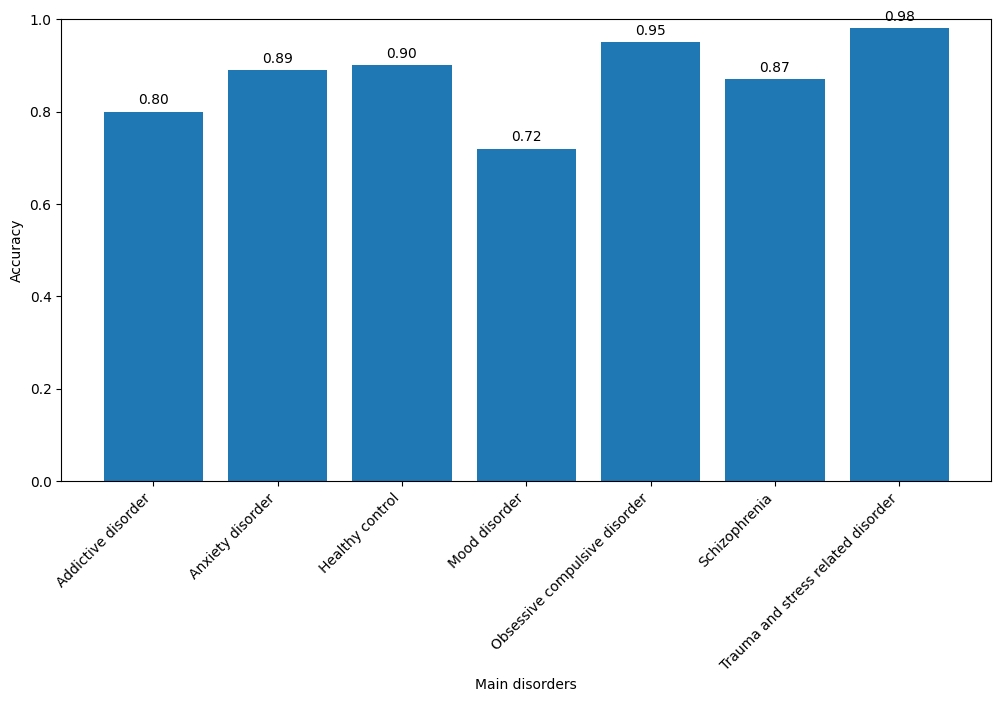

In [29]:
# Algorithm names and their accuracies
algorithms = ['Addictive disorder', 'Anxiety disorder', 'Healthy control', 'Mood disorder', 'Obsessive compulsive disorder', 'Schizophrenia',
       'Trauma and stress related disorder']

acc = [0.80, 0.89, 0.90, 0.72, 0.95, 0.87, 0.98]

# Create bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(algorithms, acc)

# Add labels and title
plt.xlabel('Main disorders')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # accuracy range from 0 to 1

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Add accuracy values on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom')

# Show chart
plt.show()